In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [104]:
file_path = r'D:\Data_Engineer\projects\spark\data_pipeline_ai\created_users.csv'  # Đường dẫn đến file của bạn
df = pd.read_csv(file_path)

In [105]:
df.shape

(211, 11)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               211 non-null    object
 1   address          211 non-null    object
 2   email            211 non-null    object
 3   first_name       211 non-null    object
 4   gender           211 non-null    object
 5   last_name        211 non-null    object
 6   phone            211 non-null    object
 7   picture          211 non-null    object
 8   post_code        211 non-null    object
 9   registered_date  211 non-null    object
 10  username         211 non-null    object
dtypes: object(11)
memory usage: 18.3+ KB


In [107]:
df.head(5)

,id,address,email,first_name,gender,last_name,phone,picture,post_code,registered_date,username
0,224e0af6-56e5-4c0d-9cce-1d1c71baf6b5,"9648 Cherry St, Steilacoom, New Mexico, United...",courtney.pearson@example.com,Courtney,female,Pearson,(301) 514-4399,https://randomuser.me/api/portraits/med/women/...,14396,2019-04-12T13:01:48.550Z,purpleduck146
1,ab3a62dc-a195-4b6a-ba27-dd38196303af,"1354 دکتر فاطمی, ایلام, آذربایجان غربی, Iran",nznyn.khmrw@example.com,نازنین,female,کامروا,007-66752997,https://randomuser.me/api/portraits/med/women/...,59459,2007-11-26T03:53:51.885Z,sadzebra849
2,bd47bd15-4584-4605-8c9d-f39d43df6cd7,"617 Ranganathan St, Giridih, Telangana, India",pranit.mardhekar@example.com,Pranit,male,Mardhekar,9580362225,https://randomuser.me/api/portraits/med/men/78...,70234,2010-10-13T12:34:43.216Z,blackpanda243
3,a0b93970-41c3-4a66-b278-66849f7197d7,"9664 Solvej, V.Skerninge, Nordjylland, Denmark",rasmus.larsen@example.com,Rasmus,male,Larsen,43597054,https://randomuser.me/api/portraits/med/men/60...,15758,2014-07-03T10:39:08.266Z,purplepanda515
4,e8c1b598-e094-4e2c-bc3c-8d5cbe81a9ae,"2486 Park Lane, Edinburgh, Kent, United Kingdom",sam.beck@example.com,Sam,female,Beck,016977 08352,https://randomuser.me/api/portraits/med/women/...,T03 7FZ,2016-06-09T17:33:47.010Z,angrygorilla721


In [108]:
# check null
print("Null data:\n", df.isnull().sum())

Null data:
 id                 0
address            0
email              0
first_name         0
gender             0
last_name          0
phone              0
picture            0
post_code          0
registered_date    0
username           0
dtype: int64


In [109]:
# check duplicate
duplicates = df.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

Number of duplicate records: 0


In [110]:
df.columns

Index(['id', 'address', 'email', 'first_name', 'gender', 'last_name', 'phone',
       'picture', 'post_code', 'registered_date', 'username'],
      dtype='object')

In [111]:
# remove 
data = df.drop(columns=['id', 'username', 'email', 'address', 'picture', 'registered_date', 'registered_date'])

In [112]:
data.head()

,first_name,gender,last_name,phone,post_code
0,Courtney,female,Pearson,(301) 514-4399,14396
1,نازنین,female,کامروا,007-66752997,59459
2,Pranit,male,Mardhekar,9580362225,70234
3,Rasmus,male,Larsen,43597054,15758
4,Sam,female,Beck,016977 08352,T03 7FZ


In [113]:
# Step 2: Process the gender column (male -> 0, female -> 1)
data['gender'] = data['gender'].apply(lambda x: 0 if x.lower() == 'male' else 1)

In [114]:
data.head()

,first_name,gender,last_name,phone,post_code
0,Courtney,1,Pearson,(301) 514-4399,14396
1,نازنین,1,کامروا,007-66752997,59459
2,Pranit,0,Mardhekar,9580362225,70234
3,Rasmus,0,Larsen,43597054,15758
4,Sam,1,Beck,016977 08352,T03 7FZ


In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   first_name  211 non-null    object
 1   gender      211 non-null    int64 
 2   last_name   211 non-null    object
 3   phone       211 non-null    object
 4   post_code   211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


### test done

In [116]:
# Create LabelEncoder instances
le_first_name = LabelEncoder()
le_last_name = LabelEncoder()
le_phone = LabelEncoder()
le_post_code = LabelEncoder()

In [117]:
# Step 3:Use LabelEncoder for the columns: first_name, last_name, phone, post_code

# Encode the string columns
data['first_name'] = le_first_name.fit_transform(data['first_name'])
data['last_name'] = le_last_name.fit_transform(data['last_name'])
data['phone'] = le_phone.fit_transform(data['phone'])
data['post_code'] = le_post_code.fit_transform(data['post_code'])

In [118]:
data.head()

,first_name,gender,last_name,phone,post_code
0,26,1,116,24,11
1,202,1,186,68,116
2,151,0,92,192,136
3,153,0,83,168,16
4,161,1,6,79,207


In [119]:
inertia = []
k_values = range(1, 11)  # Try k from 1 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)  # Store the inertia (sum of squared distances)


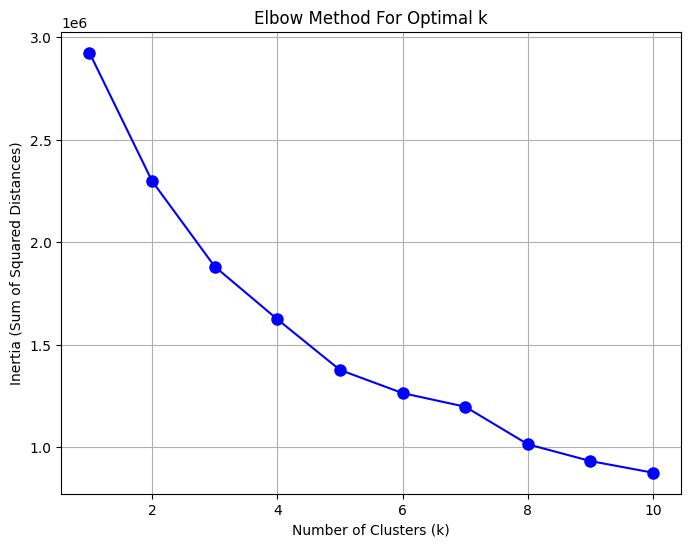

In [120]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

In [121]:
# Step 4: Train the K-Means clustering model
# Define the number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model on the data
kmeans.fit(data)

KMeans(n_clusters=2, random_state=42)

In [122]:
data['cluster'] = kmeans.labels_

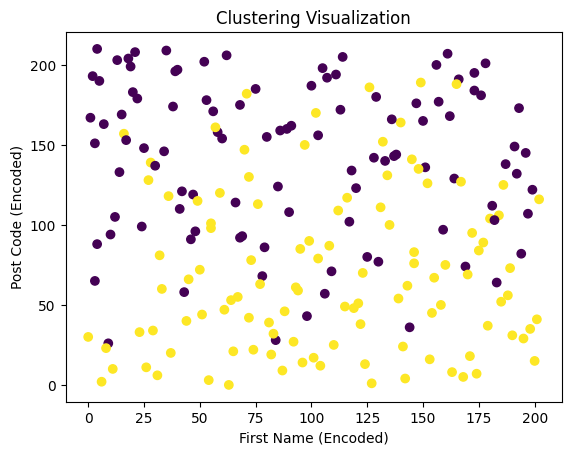

In [123]:
# Step 6 (Optional): Visualize clusters
plt.scatter(data['first_name'], data['post_code'], c=data['cluster'], cmap='viridis')
plt.xlabel('First Name (Encoded)')
plt.ylabel('Post Code (Encoded)')
plt.title('Clustering Visualization')
plt.show()

In [124]:
data['cluster'].value_counts()

cluster
1    109
0    102
Name: count, dtype: int64

In [125]:
import pickle

In [126]:
# with open('kmeans_model.pkl', 'wb') as model_file:
#     pickle.dump(kmeans, model_file)

In [127]:
with open('label_encoders.pkl', 'wb') as le_file:
    pickle.dump({
        'first_name': le_first_name,
        'last_name': le_last_name,
        'phone': le_phone,
        'post_code': le_post_code
    }, le_file)

In [128]:
# # Step 6: Load the model and LabelEncoders
# def load_model_and_encoders():
#     with open('kmeans_model.pkl', 'rb') as model_file:
#         loaded_model = pickle.load(model_file)

#     with open('label_encoders.pkl', 'rb') as le_file:
#         label_encoders = pickle.load(le_file)

#     return loaded_model, label_encoders

In [129]:
def predict_cluster(new_row):
    """
    Function to predict the cluster for a new data row.
    :param new_row: Dictionary with keys 'first_name', 'gender', 'last_name', 'phone', 'post_code'
    :return: Predicted cluster
    """
    loaded_model, label_encoders = load_model_and_encoders()

    # Prepare the new data row
    new_row_encoded = pd.DataFrame([new_row])  # Convert dictionary to DataFrame
    
    # Process gender (0 for male, 1 for female)
    new_row_encoded['gender'] = new_row_encoded['gender'].apply(lambda x: 0 if x.lower() == 'male' else 1)

    # Encode other categorical fields using the loaded LabelEncoders
    try:
        new_row_encoded['first_name'] = label_encoders['first_name'].transform(new_row_encoded['first_name'])
    except ValueError:
        new_row_encoded['first_name'] = -1  # Assign -1 for unseen labels

    try:
        new_row_encoded['last_name'] = label_encoders['last_name'].transform(new_row_encoded['last_name'])
    except ValueError:
        new_row_encoded['last_name'] = -1  # Assign -1 for unseen labels

    try:
        new_row_encoded['phone'] = label_encoders['phone'].transform(new_row_encoded['phone'])
    except ValueError:
        new_row_encoded['phone'] = -1  # Assign -1 for unseen labels

    try:
        new_row_encoded['post_code'] = label_encoders['post_code'].transform(new_row_encoded['post_code'])
    except ValueError:
        new_row_encoded['post_code'] = -1  # Assign -1 for unseen labels

    # Use the loaded KMeans model to predict the cluster
    cluster = loaded_model.predict(new_row_encoded)

    return cluster[0]

In [130]:
new_data_row = {
    'first_name': 'John', 
    'gender': 'male', 
    'last_name': 'Doe', 
    'phone': '555-1234', 
    'post_code': '12345'
}

In [131]:
# Predict the cluster for the new data row
predicted_cluster = predict_cluster(new_data_row)
print(f"The predicted cluster for the new data row is: {predicted_cluster}")

The predicted cluster for the new data row is: 1
